# **<center> Introduction to Python for Practical Problems </center>**
# **<center> New Economic School, MAE 2025 </center>**
## **<center> Section 4 </center>**

План:

    1. Визуализация данных
        1.1. Простой и быстрый вариант построения графиков
        1.2. Добавление нескольких кривых на один график и "усовершенствование" визуализации
        1.3. Использование других типов графиков для визуализации
            1.3.1. Гистограммы
            1.3.2. Столбчатые диаграммы
            1.3.3. Диаграммы рассеивания
            1.3.4. Ящик с усами
            1.3.5. Свечной график
            1.3.6. Тепловая карта
        1.4. Отображение данных на нескольких графиках одновременно
        1.5. Отображение данных по разным осям
        1.6. Полезные графики для работы с временными рядами
            1.6.1. Графики скользящего среднего
            1.6.2. Графики автокоррелированности значений временного ряда

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# 1. Визуализация данных

<center> <img src="https://matplotlib.org/_static/logo_light.svg" width=50%> </center>

Есть несколько библиотек для визуализации данных. Одной из самых популярных и удобных является библиотека `matplotlib` - библиотека для визуализации данных (как 2D, так и 3D), позволяющая создавать изображения различной сложности и видов

<center> <img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg" width=50%> </center>

Более специализированные графики удобнее всего строить с помощью библиотеки `seaborn`, которая построена на основе библиотеки `matplotlib`.

Перед тем, как рисовать различные графики, давайте подгрузим данные. На данном занятии мы будем рассматривать самые различные данные, чтобы графики были разнообразнее

In [2]:
import yfinance as yf

In [3]:
aapl = yf.Ticker("AAPL").history(start="2000-01-01").reset_index()
aapl['Date'] = pd.to_datetime(aapl['Date'].dt.date)

aapl.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03,0.792742,0.850379,0.768648,0.846127,535796800,0.0,0.0
1,2000-01-04,0.818254,0.836206,0.764869,0.774790,512377600,0.0,0.0
2,2000-01-05,0.784238,0.835733,0.778569,0.786127,778321600,0.0,0.0
3,2000-01-06,0.802191,0.808805,0.718098,0.718098,767972800,0.0,0.0
4,2000-01-07,0.729436,0.763452,0.721878,0.752113,460734400,0.0,0.0


Библиотека `matplotlib` состоит из множества различных модулей, которые в свою очередь наполнены различными классами и функциями, связанными между собой.

Наиболее широко использующимся модулем в это библиотеке является `pyplot` - высокоуровневый и удобный в обращении интерфейс. С ним мы и будем иметь дело.

Главным элементом при создании графика является рисунок - **Figure**. У рисунка есть своя структура с иерархическими связями. Так, у рисунка есть область рисовки - **Axes** (на рисунке может быть несколько областей рисовки). Также есть различные элементы рисунка - **Aesthetics** (легенда, подписи, текст и т.д.), и основа - **Canvas**.

Область рисовки - это часть изображения с пространством данных. Каждая область содержит какое-то количество осей (2 для 2D, 3 для 3D).

Координатная ось определяет область изменения входных данных. На ось наносятся значения/деления ticks и подписи к ним.

Элементы рисунка - это линии, легенда, цвета, текст и т.д.

Основой графика здесь является рисунок (**Figure**). Для создания рисунка требуется выполнить метод `plt.figure()` (не обязательно, если рисунок не сложный, и нам не нужно задавать дополнительные параметры для рисунка). Создавая рисунок, мы как бы создаем холст, на который дальше будем наносить различные элементы. Чтобы результаты рисования отразились на экране, нужно написать команду `plt.show()` (это не всегда обязательно - зависит от среды разработки, так же как и приписка `%matplotlib inline`), или в конце ячейки дописать строчку `None`. Элементы на график добавляются последовательно. 

## 1.1. Простой и быстрый вариант построения графика

**Построим график динамики цен акций *Apple* на закрытии торгов для каждого дня**

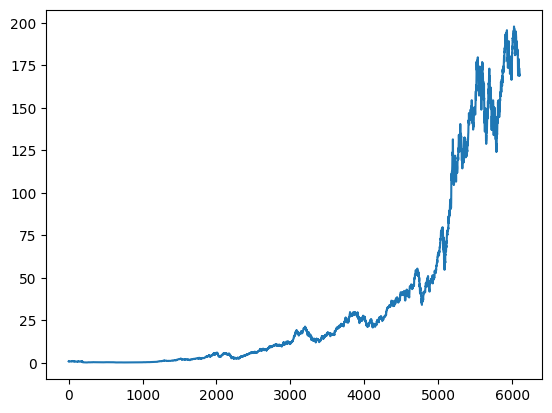

In [4]:
plt.plot(aapl['Close'])

Это самый базовый вариант рисунка без всяких наворочек и подписей. Также над рисунком находится какая-то бесячая надпись, которую можно скрыть. Далее, чтобы изменить размер рисунка, мы обратитмся к функции `figure(figsize=(a,b))`, задав размер графика через аргумент `figsize`. Для удаления надписи над графиком допишем в последней строчки ячейки `None`.

Также по оси *x* мы бы хотели отобразить даты, которым соответствовала цена акций *Aplle* в момент закрытия торгов в конце дня. Есть два варианта: можно либо в качестве аргумента внутри `plt.figure` передать набор данных для отображения их на нужной оси; либо можно в самом датафрейме указать колонку `Date` в качестве индекса. В данном случае оба варианта сработают одинаково. ВАЖНО: данные в колонке `Date` обязательно должны иметь формат `datetime`.

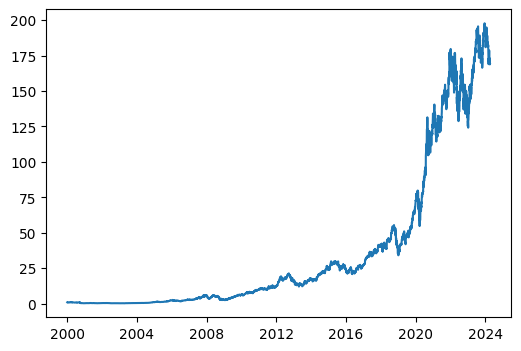

In [5]:
plt.figure(figsize=(6,4))

# plt.plot(aapl['Date'], aapl['Close'])
plt.plot(aapl.set_index('Date')['Close'])

None

Для удобства в дальнейшем будем использовать колонку `Date` в качестве индекса.

In [6]:
aapl.set_index('Date', inplace=True)

## 1.2. Добавление нескольких кривых на один график и "усовершенствование" визуализации

**Добавим к ценам закрытия все остальные цены**

Также сразу укажем к какой цене каждая кривая относится через аргумент `label`. Для отображения легенды с лэйблами на графике обязательно под инициализацией кривых добавить метод `plt.legend()`.

Кроме того, можно сразу указать название графика через метод `plt.title()`. При помощи аргумента `fontsize` можно изменить размер шрифта, например, заголовка.

Для лучшей читабельности графика давайте ограничим даты наблюдений.

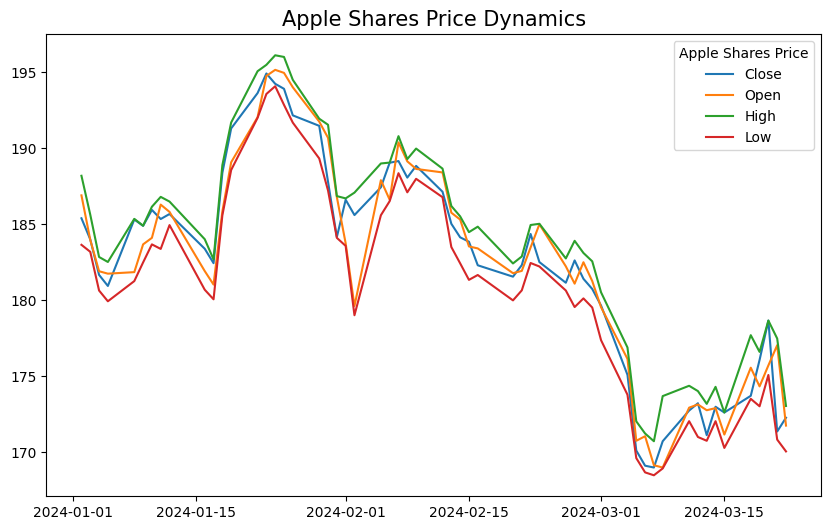

In [7]:
fig = plt.figure(figsize=(10,6))

start = '2024-01-01'
end = '2024-03-23'

plt.plot(aapl['Close'][start:end], label='Close')
plt.plot(aapl['Open'][start:end], label='Open')
plt.plot(aapl['High'][start:end], label='High')
plt.plot(aapl['Low'][start:end], label='Low')

plt.legend(title='Apple Shares Price')

plt.title('Apple Shares Price Dynamics', fontsize=15)

None

Также можно специфицировать цвета графиков на рисунке с помощью аргумента `color`

Список именованных цветов можно посмотреть [здесь](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

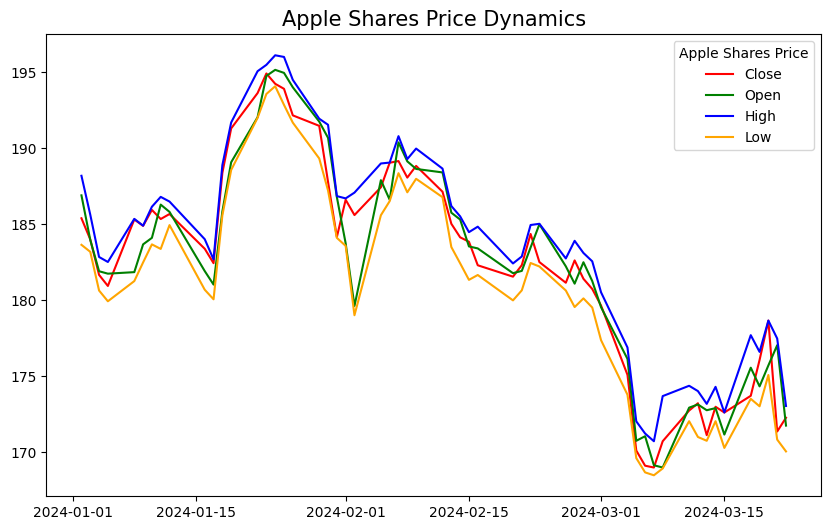

In [8]:
fig = plt.figure(figsize=(10,6))

start = '2024-01-01'
end = '2024-03-23'

plt.plot(aapl['Close'][start:end], label='Close', color='red')
plt.plot(aapl['Open'][start:end], label='Open', color='green')
plt.plot(aapl['High'][start:end], label='High', color='blue')
plt.plot(aapl['Low'][start:end], label='Low', color='orange')

plt.legend(title='Apple Shares Price')

plt.title('Apple Shares Price Dynamics', fontsize=15)

None

Также можно менять стиль линии (на пунктирный, точечный и т.д.) с помощью аргумента `linestyle`. Кроме того, точки наблюдений можно обозначить теми или иными маркерами с помощью аргумента `marker`.

Виды стилей линии можно посмотреть [здесь](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/linestyles.html)

Виды маркеров можно посмотреть [здесь](https://matplotlib.org/stable/api/markers_api.html)

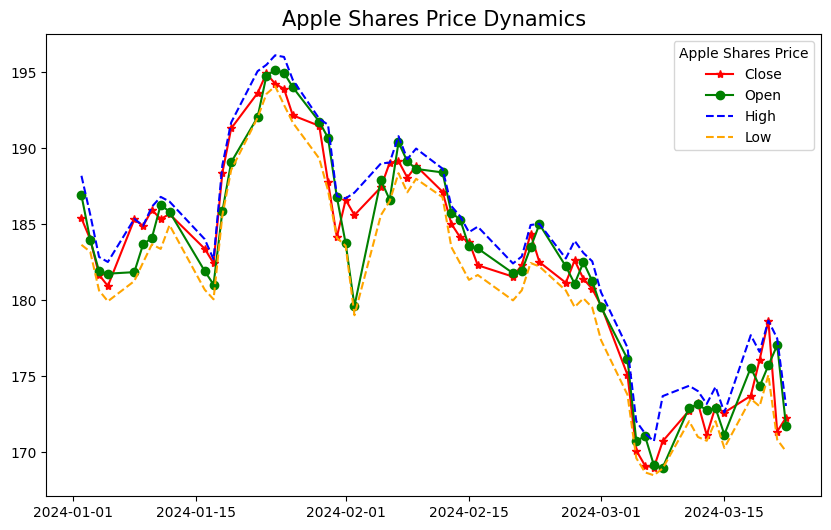

In [9]:
fig = plt.figure(figsize=(10,6))

start = '2024-01-01'
end = '2024-03-23'

plt.plot(aapl['Close'][start:end], label='Close', color='red', marker='*')
plt.plot(aapl['Open'][start:end], label='Open', color='green', marker='o')
plt.plot(aapl['High'][start:end], label='High', color='blue', linestyle='dashed')
plt.plot(aapl['Low'][start:end], label='Low', color='orange', linestyle='dashed')

plt.legend(title='Apple Shares Price')

plt.title('Apple Shares Price Dynamics', fontsize=15)

None

Также можно менять параметры маркера, такие как его цвет и размер при помощи аргмуентов `markerfacecolor` и `markersize`. А можно менять и параметры линии, увеличив например ее толщину задав параметр `linewidth`.

Также на рисунок можно нанести названия осей и название рисунка с помощью методов `plt.xlabel(..)`, `plt.ylabel(..)`.

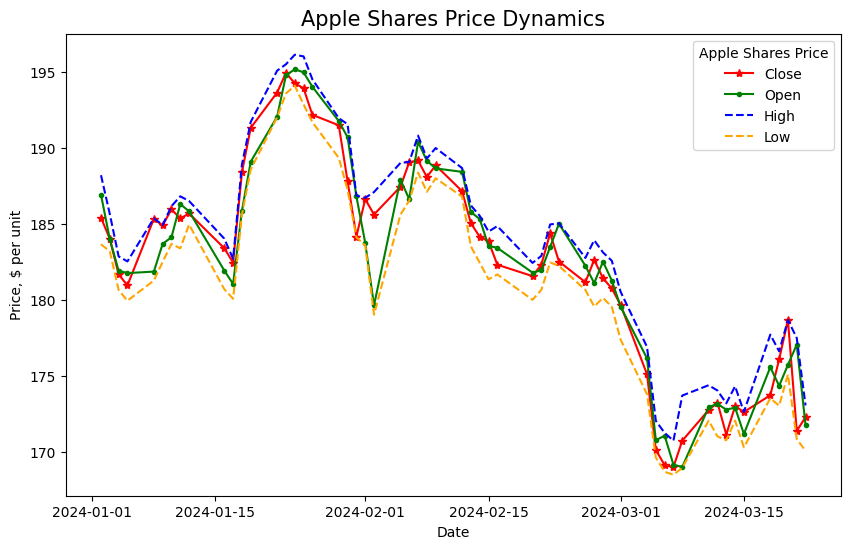

In [10]:
fig = plt.figure(figsize=(10,6))

start = '2024-01-01'
end = '2024-03-23'

plt.plot(aapl['Close'][start:end], label='Close', color='red', marker='*')
plt.plot(aapl['Open'][start:end], label='Open', color='green', marker='.')
plt.plot(aapl['High'][start:end], label='High', color='blue', linestyle='dashed')
plt.plot(aapl['Low'][start:end], label='Low', color='orange', linestyle='dashed')

plt.legend(title='Apple Shares Price')

plt.title('Apple Shares Price Dynamics', fontsize=15)

plt.xlabel('Date')
plt.ylabel('Price, $ per unit')

None

Иногда возникает необходимость развернуть разбиение по осям так, чтобы они не накладывались друг на друга. Сделать это можно с помощью аргумента `rotation` в методе `plt.xticks()` или `plt.yticks()`.

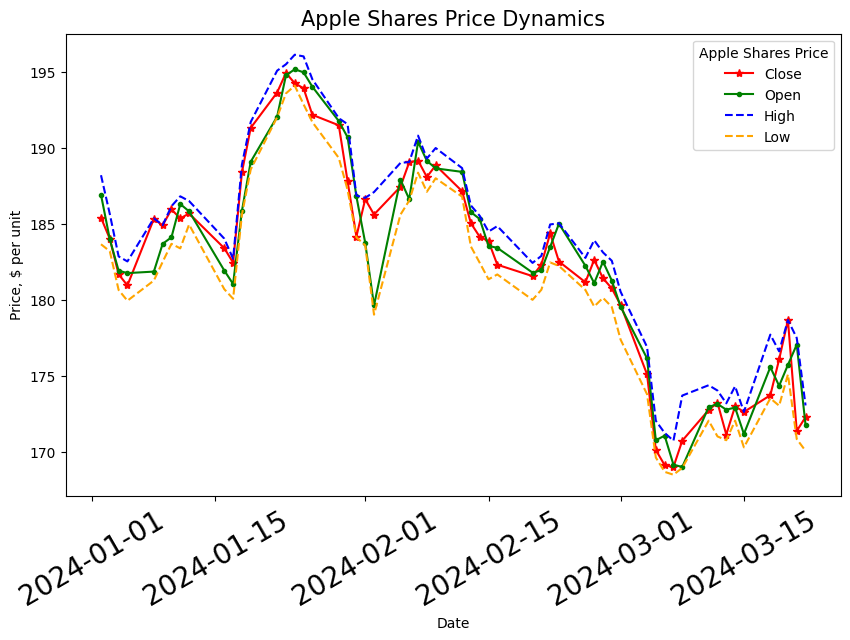

In [11]:
fig = plt.figure(figsize=(10,6))

start = '2024-01-01'
end = '2024-03-23'

plt.plot(aapl['Close'][start:end], label='Close', color='red', marker='*')
plt.plot(aapl['Open'][start:end], label='Open', color='green', marker='.')
plt.plot(aapl['High'][start:end], label='High', color='blue', linestyle='dashed')
plt.plot(aapl['Low'][start:end], label='Low', color='orange', linestyle='dashed')

plt.legend(title='Apple Shares Price')

plt.title('Apple Shares Price Dynamics', fontsize=15)

plt.xlabel('Date')
plt.ylabel('Price, $ per unit')

plt.xticks(fontsize=20, rotation=30)

None

Наконец, к графику можно добавить вспомогательные линии сетки при помощи метода `plt.grid()`. 

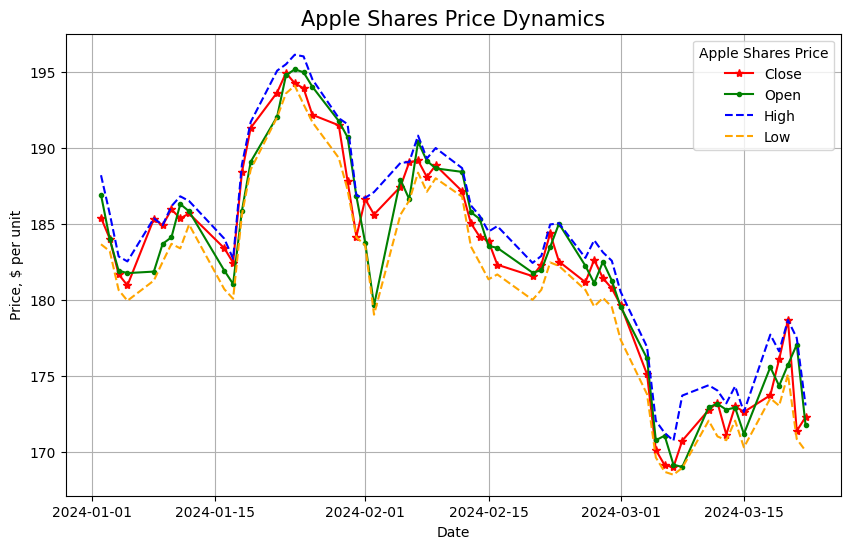

In [12]:
fig = plt.figure(figsize=(10,6))

start = '2024-01-01'
end = '2024-03-23'

plt.plot(aapl['Close'][start:end], label='Close', color='red', marker='*')
plt.plot(aapl['Open'][start:end], label='Open', color='green', marker='.')
plt.plot(aapl['High'][start:end], label='High', color='blue', linestyle='dashed')
plt.plot(aapl['Low'][start:end], label='Low', color='orange', linestyle='dashed')

plt.legend(title='Apple Shares Price')

plt.title('Apple Shares Price Dynamics', fontsize=15)

plt.xlabel('Date')
plt.ylabel('Price, $ per unit')

plt.grid()

None

Можем также добавить вертикальную или горизонтальную линию на координату с помощью методов `plt.axhline()`, `plt.axvline()`.

In [13]:
import datetime

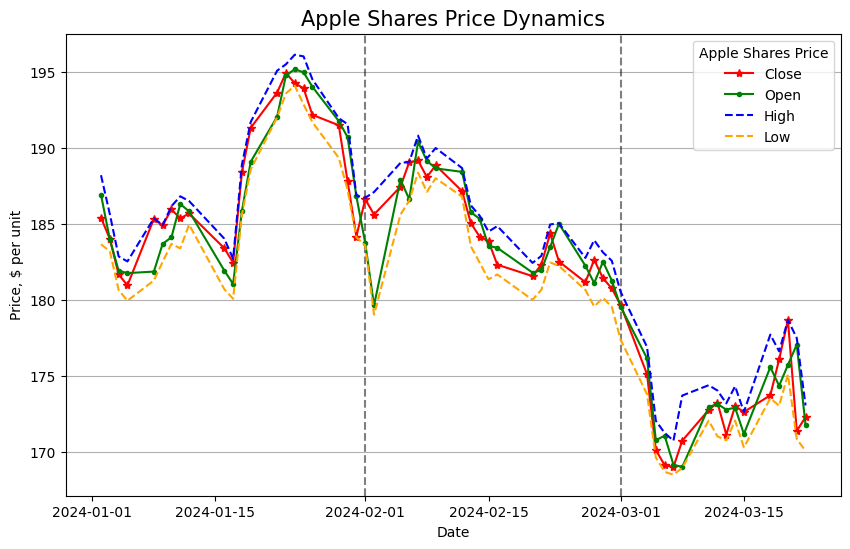

In [14]:
fig = plt.figure(figsize=(10,6))

start = '2024-01-01'
end = '2024-03-23'

plt.axvline(x=datetime.date(2024, 2, 1), color='black', linestyle='dashed', alpha=0.5)
plt.axvline(x=datetime.date(2024, 3, 1), color='black', linestyle='dashed', alpha=0.5)
# аргумент alpha отвечает за степень прозрачности кривой

plt.plot(aapl['Close'][start:end], label='Close', color='red', marker='*')
plt.plot(aapl['Open'][start:end], label='Open', color='green', marker='.')
plt.plot(aapl['High'][start:end], label='High', color='blue', linestyle='dashed')
plt.plot(aapl['Low'][start:end], label='Low', color='orange', linestyle='dashed')

plt.legend(title='Apple Shares Price')

plt.title('Apple Shares Price Dynamics', fontsize=15)

plt.xlabel('Date')
plt.ylabel('Price, $ per unit')

plt.grid(axis='y')

None

Также можно нанести текст/надписи на график с помощью `plt.text()`.

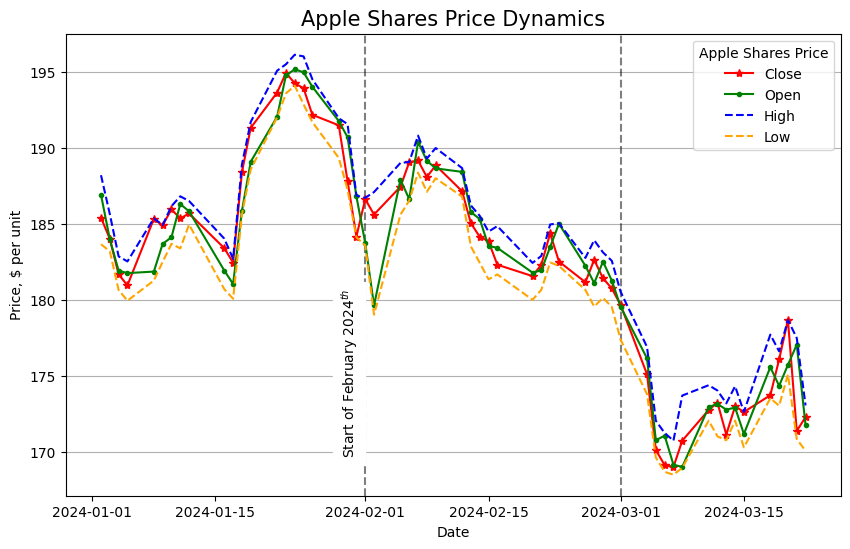

In [15]:
fig = plt.figure(figsize=(10,6))

start = '2024-01-01'
end = '2024-03-23'

plt.axvline(x=datetime.date(2024, 2, 1), color='black', linestyle='dashed', alpha=0.5)
plt.axvline(x=datetime.date(2024, 3, 1), color='black', linestyle='dashed', alpha=0.5)
# аргумент alpha отвечает за степень прозрачности кривой

plt.plot(aapl['Close'][start:end], label='Close', color='red', marker='*')
plt.plot(aapl['Open'][start:end], label='Open', color='green', marker='.')
plt.plot(aapl['High'][start:end], label='High', color='blue', linestyle='dashed')
plt.plot(aapl['Low'][start:end], label='Low', color='orange', linestyle='dashed')

plt.legend(title='Apple Shares Price')

plt.title('Apple Shares Price Dynamics', fontsize=15)

plt.xlabel('Date')
plt.ylabel('Price, $ per unit')

plt.grid(axis='y')

plt.text(x=datetime.date(2024, 1, 29), y=170, s='Start of February $2024^{th}$', rotation=90, bbox=dict(color='white'), color='black')

None

Также с помощью `plt.axvspan()` можно заполнить пространство между двумя вертикальными линиями (`plt.axhspan()` для заполнения пространства между двумя горизонтальными линиями) и подобрать цвет (прям как на рисунках по макро).

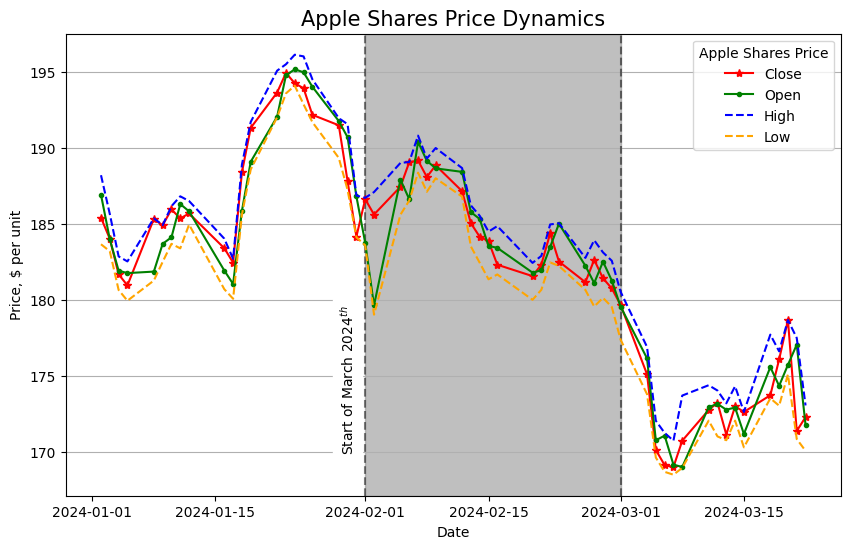

In [16]:
fig = plt.figure(figsize=(10,6))

start = '2024-01-01'
end = '2024-03-23'

plt.axvline(x=datetime.date(2024, 2, 1), color='black', linestyle='dashed', alpha=0.5)
plt.axvline(x=datetime.date(2024, 3, 1), color='black', linestyle='dashed', alpha=0.5)
# аргумент alpha отвечает за степень прозрачности кривой

plt.axvspan(xmin=datetime.date(2024, 2, 1), xmax=datetime.date(2024, 3, 1), alpha=0.5, color='grey')

plt.plot(aapl['Close'][start:end], label='Close', color='red', marker='*')
plt.plot(aapl['Open'][start:end], label='Open', color='green', marker='.')
plt.plot(aapl['High'][start:end], label='High', color='blue', linestyle='dashed')
plt.plot(aapl['Low'][start:end], label='Low', color='orange', linestyle='dashed')

plt.legend(title='Apple Shares Price')

plt.title('Apple Shares Price Dynamics', fontsize=15)

plt.xlabel('Date')
plt.ylabel('Price, $ per unit')

plt.grid(axis='y')

plt.text(x=datetime.date(2024, 1, 29), y=170, s='Start of March $2024^{th}$', rotation=90, bbox=dict(color='white'), color='black')

None

## 1.3. Использование других типов графиков для визуализации

Но рисовать можно не только обычные графики. Нам `matplotlib.pyplot` позволяет также рисовать гистограммы, диаграммы рассеивания (scatterplot), графики ящика с усами - boxplot, "свечные" графики и многое другое.

Для этого давайте перейдем к другому набору данных - данным по предложениям на *AirBnb*.

In [17]:
airbnb = pd.read_csv('AB_NYC_2019.csv')

airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### 1.3.1. Гистограммы

Гистограммы предоставляют нам возможность посмотреть на распределение данных. Давайте взглянем на цену арендной недвижимости с AirBnb.

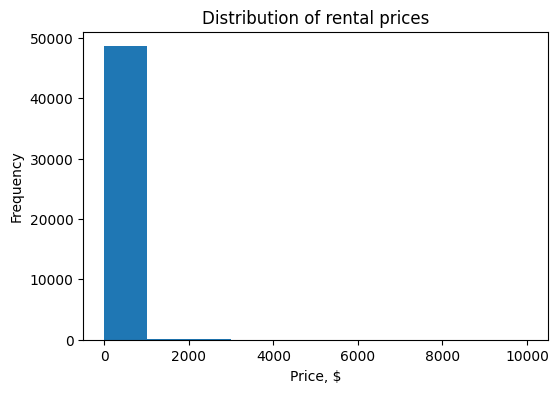

In [18]:
fig = plt.figure(figsize=(6,4))

plt.hist(airbnb['price'])

plt.xlabel('Price, $')
plt.ylabel('Frequency')

plt.title('Distribution of rental prices')

None

К сожалению, график выше мало о чем нам говорит из-за наличия выбросов. Давайте с помощью аргумента `range` в `plt.hist()` зададим границы отображения данных.

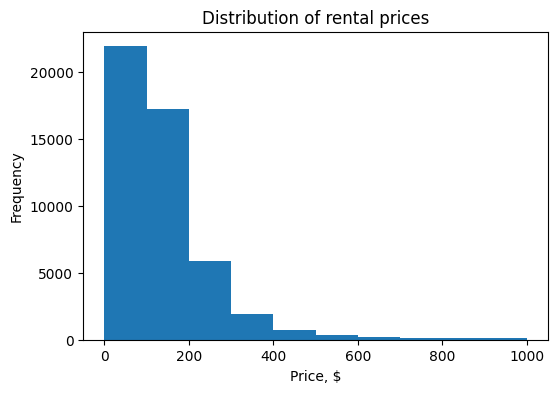

In [19]:
fig = plt.figure(figsize=(6,4))

plt.hist(airbnb['price'], range=[0,1000])

plt.xlabel('Price, $')
plt.ylabel('Frequency')

plt.title('Distribution of rental prices')

None

Так-то намного лучше :)

Также мы можем менять число бинов аргументом `bins`, тем самым меняя границы разбиения для построения гистограммы.

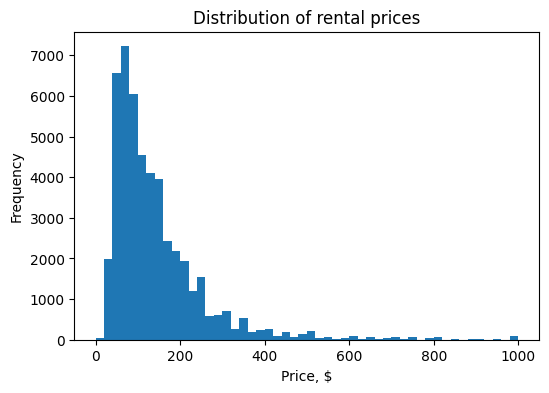

In [20]:
fig = plt.figure(figsize=(6,4))

plt.hist(airbnb['price'], range=[0,1000], bins=50)

plt.xlabel('Price, $')
plt.ylabel('Frequency')

plt.title('Distribution of rental prices')

None

А можем вместо подсчета наблюдений в бине считать частоту с помощью аргумента `density` (см. ось Y на графике выше и ниже)

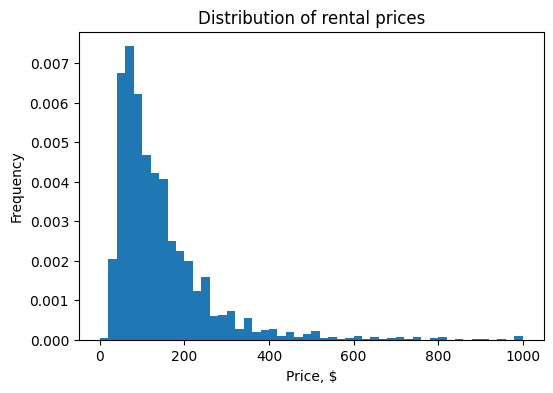

In [21]:
fig = plt.figure(figsize=(6,4))

plt.hist(airbnb['price'], range=[0,1000], bins=50, density=True)

plt.xlabel('Price, $')
plt.ylabel('Frequency')

plt.title('Distribution of rental prices')

None

Воспользуемся библиотекой `seaborn`.

Можно построить гистограмму с графиком плотности с помощью `sns.distplot`, где `kde` отвечает за построение графика плотности, а `hist` - за построение гистограммы.

`color` по дефолту отвечает за цвет графика плотности. Для задания параметров гитогграммы их можно передать через `hist_kws = {'param_name': value, ...}`

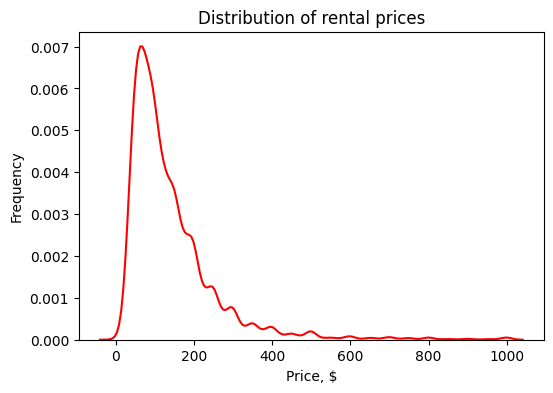

In [22]:
fig = plt.figure(figsize=(6,4))

sns.distplot(airbnb[airbnb['price']<=1000]['price'], bins=50, color='red', kde=True, hist=False, hist_kws={'color': 'blue', 'alpha': 1})

plt.xlabel('Price, $')
plt.ylabel('Frequency')

plt.title('Distribution of rental prices')

None

Можем на одном графике отобразить и график плотности, и гистограмму

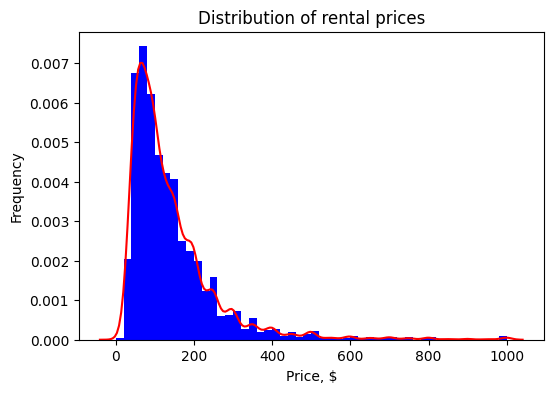

In [23]:
fig = plt.figure(figsize=(6,4))

sns.distplot(airbnb[airbnb['price']<=1000]['price'], bins=50, color='red', kde=True, hist=True, hist_kws={'color': 'blue', 'alpha': 1})

plt.xlabel('Price, $')
plt.ylabel('Frequency')

plt.title('Distribution of rental prices')

None

Можно также смотреть на кумулятивную эмпирическую функцию распределения с помощью аргумента `cumulative`.

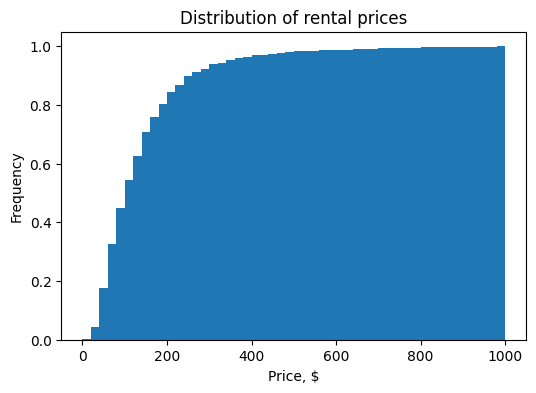

In [24]:
fig = plt.figure(figsize=(6,4))

plt.hist(airbnb['price'], range=[0,1000], bins=50, density=True, cumulative=True)

plt.xlabel('Price, $')
plt.ylabel('Frequency')

plt.title('Distribution of rental prices')

None

При нанесении нескольких гистограмм (сравнение между какими-то группами) на 1 график, они могут пересекатсья/наслаиваться так, что не видно какой-то из них. Для этого можно добавить степень прозрачности каждого графика с помощью аргумента `alpha`.

Давайте рассмотрим распределение цен на арендну недвижимость в разбиении районов города

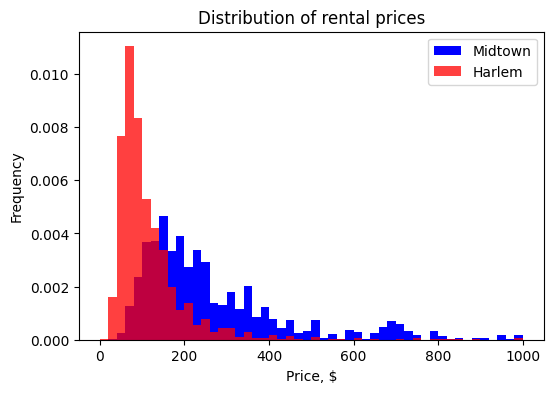

In [25]:
fig = plt.figure(figsize=(6,4))

plt.hist(airbnb[airbnb['neighbourhood'] == 'Midtown']['price'], 
         range=[0,1000],
         bins=50,
         density=True, 
         alpha=1, 
         color='blue', 
         label='Midtown')
plt.hist(airbnb[airbnb['neighbourhood'] == 'Harlem']['price'], 
         range=[0,1000], 
         bins=50,
         density=True, 
         alpha=0.75, 
         color='red', 
         label='Harlem')

plt.legend()

plt.xlabel('Price, $')
plt.ylabel('Frequency')

plt.title('Distribution of rental prices')

None

Отсюда легко увидеть, что стоимость арендной недвижимости в центре города, в среднем, более высокая.

### 1.3.2. Столбчатые диаграммы

Давайте для начала посчитаем среднюю цену аренды по каждому типу апартаментов.

In [26]:
price_by_types = airbnb.groupby('room_type')['price'].mean()

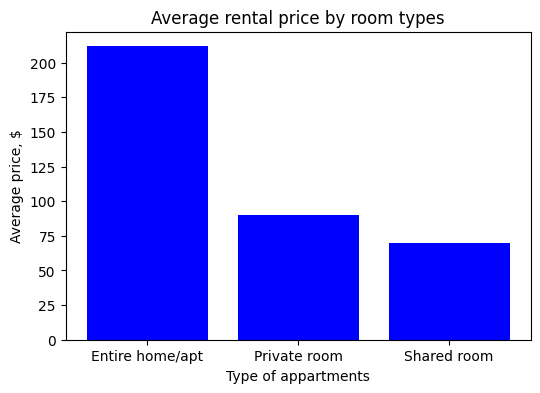

In [27]:
fig = plt.figure(figsize=(6,4))

plt.bar(price_by_types.index, price_by_types, color='blue') # Здесь обязательно указывать данны по обеим осям

plt.xlabel('Type of appartments')
plt.ylabel('Average price, $')

plt.title('Average rental price by room types')

None

Еще иногда бывает удобно использовать горизонтальные столбчатые диаграммы `barh()`.

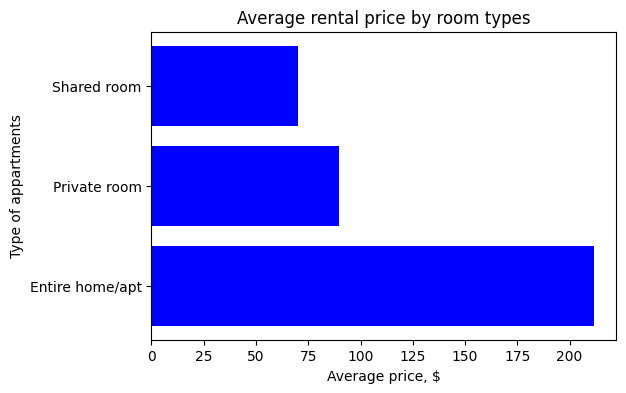

In [28]:
fig = plt.figure(figsize=(6,4))

plt.barh(price_by_types.index, price_by_types, color='blue') # Здесь обязательно указывать данны по обеим осям

plt.ylabel('Type of appartments')
plt.xlabel('Average price, $')

plt.title('Average rental price by room types')

None

### 1.3.3. Диаграммы рассеивания

Для того, чтобы, например, посмотреть взаимосвязь между количеством отзывов и ценой, можно воспользоваться диаграммой рассеивания, вызываемой при помощи метода `scatter`.

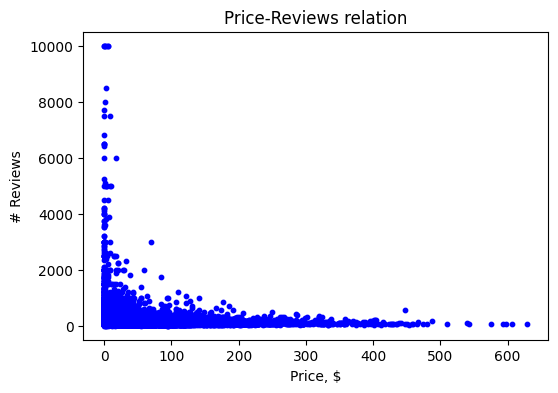

In [29]:
fig = plt.figure(figsize=(6,4))

plt.scatter(x=airbnb['number_of_reviews'], y=airbnb['price'], color='blue', s=10) # Аргумент s отвечает за величину маркеров


plt.xlabel('Price, $')
plt.ylabel('# Reviews')

plt.title('Price-Reviews relation')

None

Давайте построим более специализированные графики с использованием библиотеки `seaborn`.

Например, можно сделать диаграмму рассеивания, указав группы через параметр `hue`.

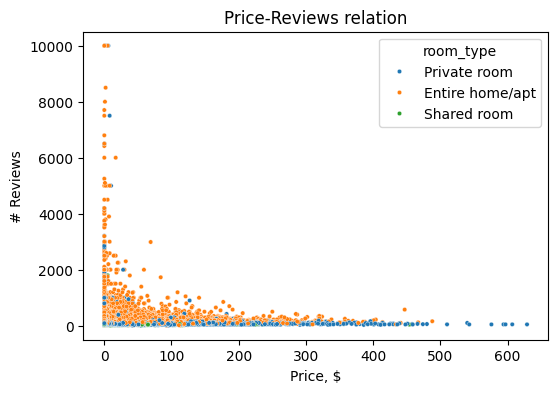

In [30]:
fig = plt.figure(figsize=(6,4))

sns.scatterplot(x=airbnb['number_of_reviews'], 
                y=airbnb['price'], 
                hue=airbnb['room_type'], 
                s=10) # Аргумент s отвечает за величину маркеров

plt.xlabel('Price, $')
plt.ylabel('# Reviews')

plt.title('Price-Reviews relation')

None

Еще удобно на взаимосвязь между ценой, типом комнаты и ниличием отзывов посмотреть при помощи графика `barplot` с указанием величины доверительного интервала.

Создадим дамми-переменную `has_reviews`, равную 0 в случае отсутствия отзывов и 1 в обратном случае.

In [31]:
airbnb['has_reviews'] = np.where(airbnb['number_of_reviews'] > 0, 1, 0).astype("str")

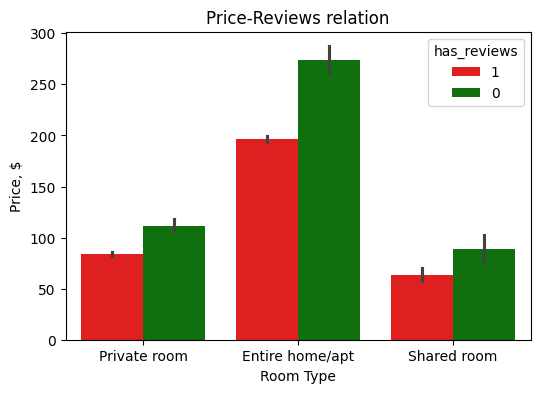

In [32]:
fig = plt.figure(figsize=(6,4))

sns.barplot(data=airbnb, x="room_type", y="price", hue="has_reviews", ci=95, palette=['red', 'green'])
# Аргумент ci означает "Доверительный интервал"

plt.xlabel('Room Type')
plt.ylabel('Price, $')

plt.title('Price-Reviews relation')

None

### 1.3.4. "Ящик с усами"

Еще одним интересным и полезным графиком является "ящик с усами", или `boxplot`. Подробнее про него можно прочитать [тут](https://seaborn.pydata.org/generated/seaborn.boxplot.html). Такой график предлагает нам возможность посмотреть на среднее значение показателя, стандартные отклонения значений и распределение значений на оси.

Давайте посмотрим распределение числа отзывов по разным районам.

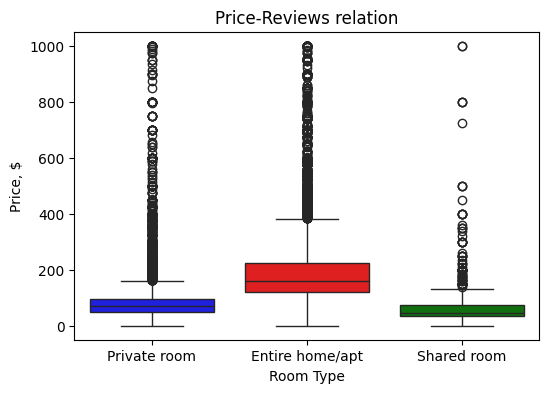

In [33]:
fig = plt.figure(figsize=(6,4))

sns.boxplot(x=airbnb[airbnb['price']<=1000]['room_type'],
            y=airbnb[airbnb['price']<=1000]['price'],
            palette=['blue', 'red', 'green'])

plt.xlabel('Room Type')
plt.ylabel('Price, $')

plt.title('Price-Reviews relation')

None

Из этого графика, например, можно увидеть, что наивысшая средняя цена имела место в аренде целых домов или апартаментов, при этом наивысший разюрос цен также был характерен для такого типа арендной недвижимости.

### 1.3.5. Свечной график

Свечной график, или `violinplot` позволяет смотреть нам одновременно на среднее значение показателя, его меру разброса и распределение наблюдений в разбиении по классам.

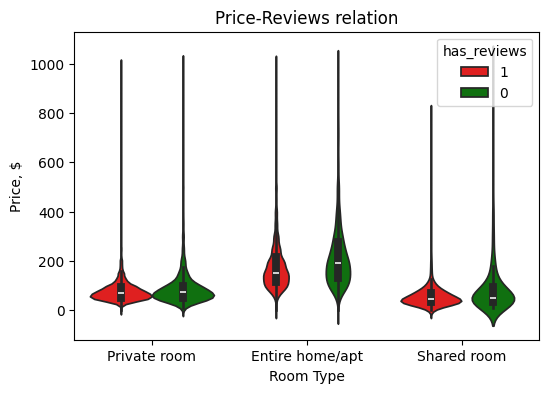

In [34]:
fig = plt.figure(figsize=(6,4))

sns.violinplot(x=airbnb[airbnb['price']<=1000]['room_type'], 
               y=airbnb[airbnb['price']<=1000]['price'], 
               hue=airbnb[airbnb['price']<=1000]['has_reviews'],
               palette=['red', 'green'])

plt.xlabel('Room Type')
plt.ylabel('Price, $')

plt.title('Price-Reviews relation')

None

Этот график, в свою очередь, дает нам более понятное эмпирическое распределение цен в зависимости от типа арендной недвижимости и наличия у нее отзывов.

С помощью аргумента `split` можно отобразить два распределения цены (по has_reviews) для типа арендной недвижимости на одной "свечке".

Также можно задать то, что хотим видеть внутри свечки с помощью аргумента `inner` (укажем, что ничего - `None`).

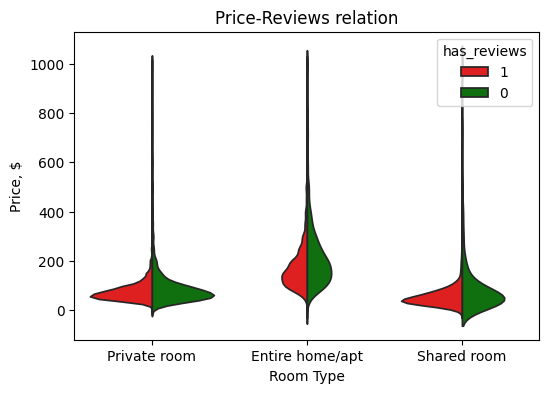

In [35]:
fig = plt.figure(figsize=(6,4))

sns.violinplot(x=airbnb[airbnb['price']<=1000]['room_type'], 
               y=airbnb[airbnb['price']<=1000]['price'], 
               hue=airbnb[airbnb['price']<=1000]['has_reviews'],
               palette=['red', 'green'],
               split=True,
               inner=None)

plt.xlabel('Room Type')
plt.ylabel('Price, $')

plt.title('Price-Reviews relation')

None

Так, например, более отчетливо видно, что для недвижимости с отзывами распределение цен имеет более четкий и остроконечный вид.

### 1.3.6. Тепловая карта

Также можно создать и графики "тепловой карты" с помощью `sns.heatmap`. Это тип графиков, на которых с помощью цвета (а иногда с отображением значений) отмечаются распределения того или иного показетеля. Это наиболее компактный и понятный вариант отображения, например, различий "в среднем".

Важно, что для построения тепловых карт данные должны быть скомпанованы и структурированы под что-то вроде сводной таблицы.

Давайте посмотрим на распределение средних цен на аренду недвижимости в разбиении по типу недвижимости и району, в котором она располагается.

In [36]:
# Структурируем данные для построения тепловой карты
heatmap_data = airbnb.groupby(['neighbourhood_group', 'room_type'])['price'].mean()\
.reset_index()\
.pivot(index = 'neighbourhood_group', columns = 'room_type', values = 'price')
# pivot - метод для преобразования данных таблицы в сводную таблицу

In [37]:
heatmap_data

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


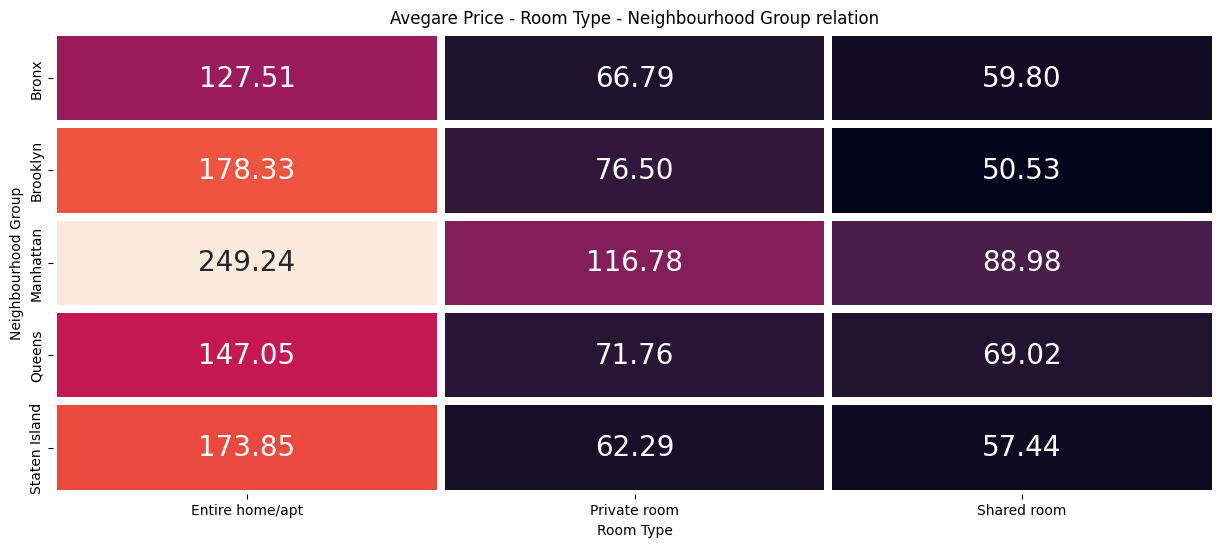

In [38]:
fig = plt.figure(figsize=(15,6))

sns.heatmap(heatmap_data, annot=True, linewidths=5.5, cbar=False, fmt='.2f', annot_kws={'fontsize': 20})

plt.xlabel('Room Type')
plt.ylabel('Neighbourhood Group')

plt.title('Avegare Price - Room Type - Neighbourhood Group relation')

None

Отсюда, например, выидно, что, в среднем, на Манхеттене цены на аренду жилья через AirBnb выше, чем в других района. Кроме того, дома целиком стоят также, в среднем, дороже, чем другие типы жилья. Вместе с тем, можно заметить, что наиболее дорогая недвижимость относится к типу домов целиком, которые расположены на Манхеттене.

In [39]:
heatmap_data

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


Пример heatmap для матрицы корреляций. Параметр `cbar` отвечает за наличие тепловой шкалы справа, `annot` - позволяет наносить значения в поля, `fmt` специфицирует до скольки знаков округлять значения, `linewidths` отвечает за расстояние между блоками

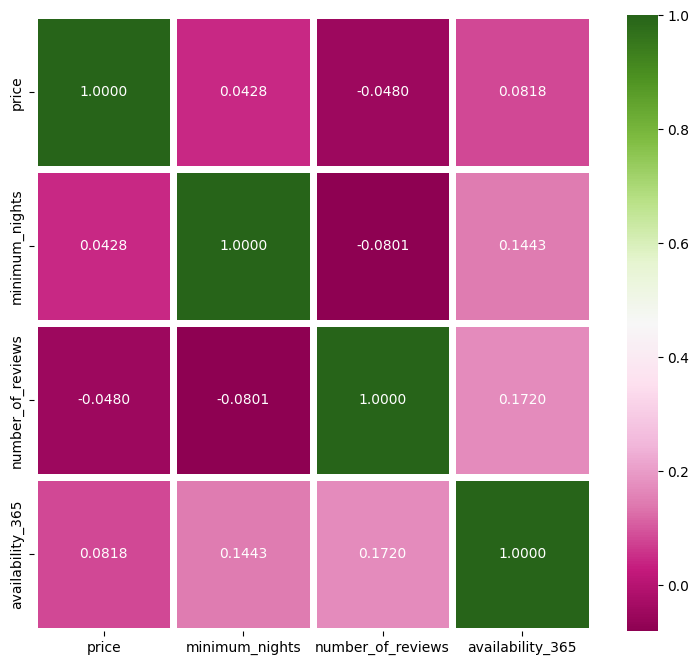

In [40]:
fig = plt.figure(figsize=(9,8))

sns.heatmap(airbnb[['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].corr(), 
            annot=True, 
            fmt='.4f', 
            linewidths=5,
            cmap='PiYG')

None

## 1.4. Отображение данных на нескольких графиках одновременно

In [41]:
shop = pd.read_csv('supermarket_sales.csv')

shop.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Часто возникает потребность в создании рисунка с несколькими подграфиками. Давайте создадим несколько таких.

Ниже создадим рисунок с двумя подграфиками по столбцам.

С помощью `plt.suptitle()` можно добавить название всему рисунку. В случае подграфиков давать название им, а также названия осям можно с помощью `ax[..].set_title()`, `ax[..].set_xlabel()`, `ax[..].set_ylabel()`.

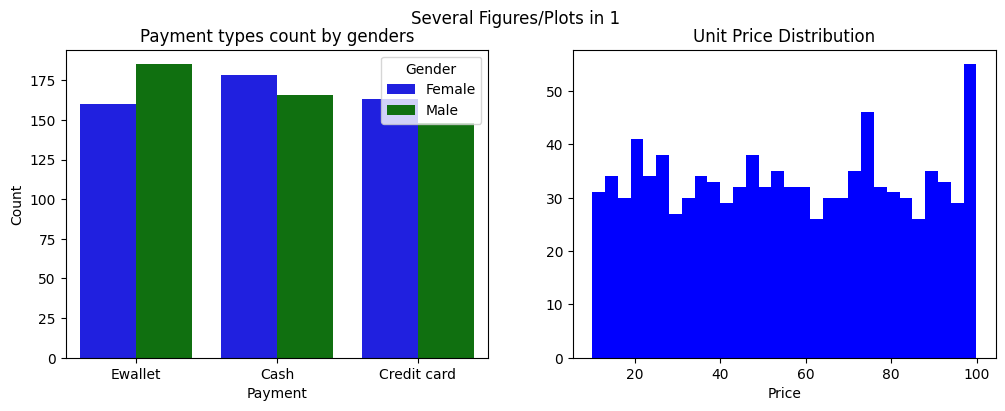

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

plt.suptitle('Several Figures/Plots in 1')

sns.countplot(x=shop['Payment'], hue=shop['Gender'], palette=['blue', 'green'], ax=ax[0])
ax[0].set_title('Payment types count by genders')
ax[0].legend(title='Gender')
ax[0].set_ylabel('Count')

ax[1].hist(shop['Unit price'], bins=30, color='blue')
ax[1].set_xlabel('Price')
ax[1].set_title('Unit Price Distribution')

None

Можно также создать рисунок из подграфиков по строкам и столбцам. Тогда нужно индексироваться в `ax` по нескольким координатам (строка-столбец).

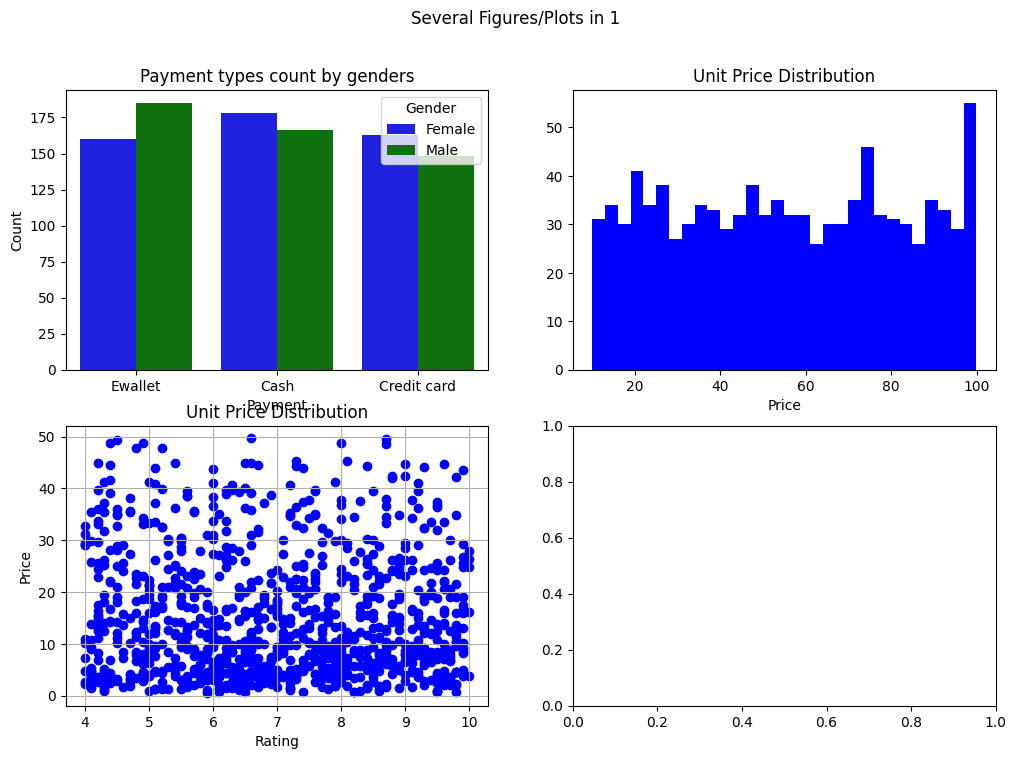

In [43]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

plt.suptitle('Several Figures/Plots in 1')

sns.countplot(x=shop['Payment'], hue=shop['Gender'], palette=['blue', 'green'], ax=ax[0,0])
ax[0,0].set_title('Payment types count by genders')
ax[0,0].legend(title='Gender')
ax[0,0].set_ylabel('Count')

ax[0,1].hist(shop['Unit price'], bins=30, color='blue')
ax[0,1].set_xlabel('Price')
ax[0,1].set_title('Unit Price Distribution')

ax[1,0].scatter(x=shop['Rating'], y=shop['gross income'], color='blue')
ax[1,0].set_xlabel('Rating')
ax[1,0].set_ylabel('Price')
ax[1,0].set_title('Unit Price Distribution')
ax[1,0].grid()

None

Можно удалить оставшийся лишний график обратившись ко всему рисунку методом `delaxes(..)`, указав в нем область нужного подграфика.

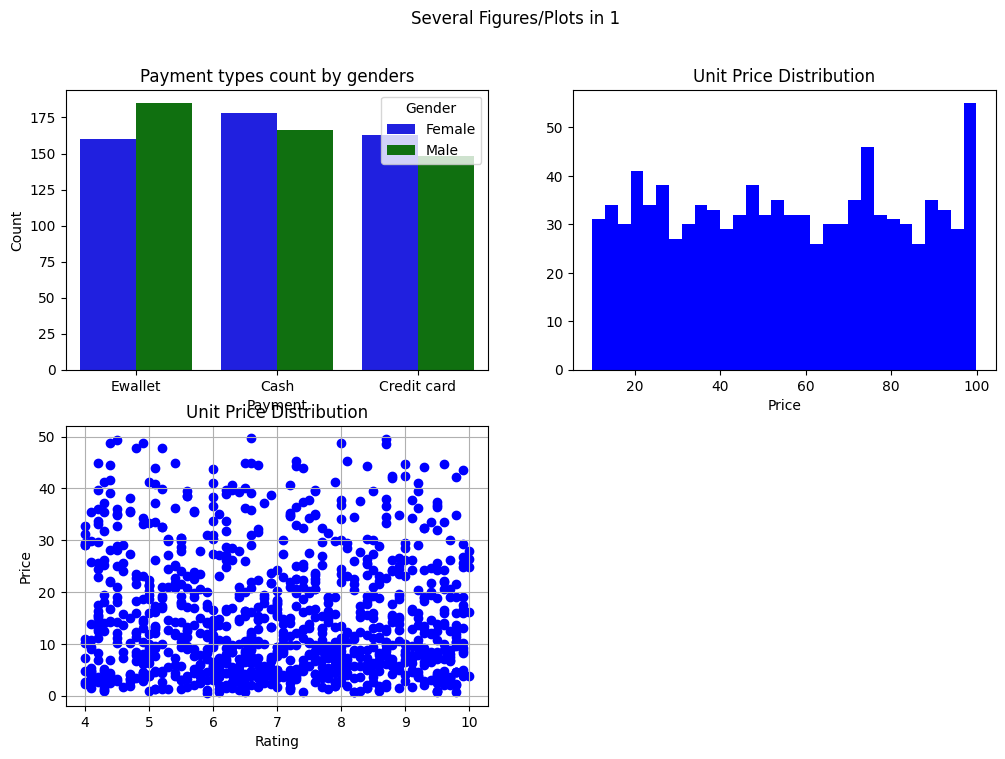

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

plt.suptitle('Several Figures/Plots in 1')

sns.countplot(x=shop['Payment'], hue=shop['Gender'], palette=['blue', 'green'], ax=ax[0,0])
ax[0,0].set_title('Payment types count by genders')
ax[0,0].legend(title='Gender')
ax[0,0].set_ylabel('Count')

ax[0,1].hist(shop['Unit price'], bins=30, color='blue')
ax[0,1].set_xlabel('Price')
ax[0,1].set_title('Unit Price Distribution')

ax[1,0].scatter(x=shop['Rating'], y=shop['gross income'], color='blue')
ax[1,0].set_xlabel('Rating')
ax[1,0].set_ylabel('Price')
ax[1,0].set_title('Unit Price Distribution')
ax[1,0].grid()

fig.delaxes(ax[1,1])

None

Также все это дело можно сохранить с помощью метода `plt.savefig(..)`, указав в нем путь и имя вашего рисунка с нужным Вам расширением (pdf, png, jpg, eps, ...)

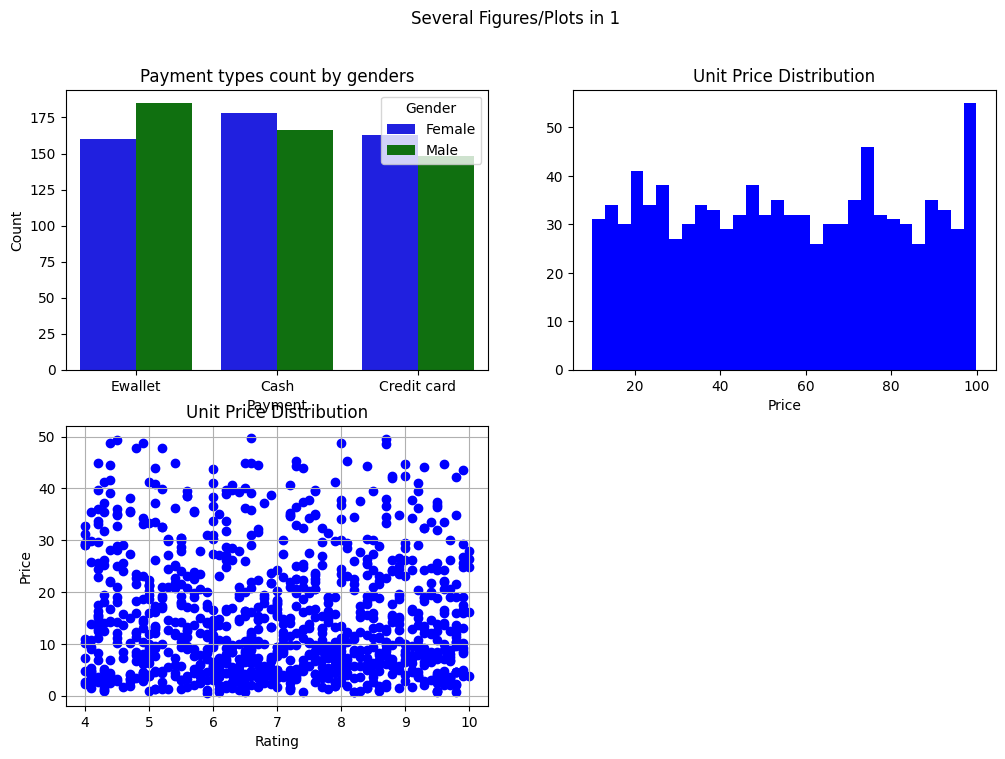

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(12,8))

plt.suptitle('Several Figures/Plots in 1')

sns.countplot(x=shop['Payment'], hue=shop['Gender'], palette=['blue', 'green'], ax=ax[0,0])
ax[0,0].set_title('Payment types count by genders')
ax[0,0].legend(title='Gender')
ax[0,0].set_ylabel('Count')

ax[0,1].hist(shop['Unit price'], bins=30, color='blue')
ax[0,1].set_xlabel('Price')
ax[0,1].set_title('Unit Price Distribution')

ax[1,0].scatter(x=shop['Rating'], y=shop['gross income'], color='blue')
ax[1,0].set_xlabel('Rating')
ax[1,0].set_ylabel('Price')
ax[1,0].set_title('Unit Price Distribution')
ax[1,0].grid()

fig.delaxes(ax[1,1])

plt.savefig('path_and_your_figure_name.pdf') # png, jpg, eps

None

## 1.5. Отображение данных по разным осям

Бывает так, что на одном рисунке мы хотим построить несколько графиков, но размерность у них разная - допустим, ВВП и ключевую ставку. Однако если расположить оба графика так, что у них будет одна ось Y, то график со ставкой будет лежать в районе 0, в то время как динамику по ВВП мы сможем наблюдать нормально. А хотелось бы наблюдать нормально все.

Для этого можно создать график с двумя осями. Для этого создадим рисунок (fig) и его области (ax) через `plt.subplots(nrows = n, ncols = k, figsize = (x, y))`

Где `nrows` и `ncols` это число областей для отрисовки (число подграфиков) по строчкам и столбцам. `figsize` задается для общего графика.

На `ax` рисуем график. Далее берем и создаем новую ось с помощью `ax.twinx()` и рисуем на ней нужный график.

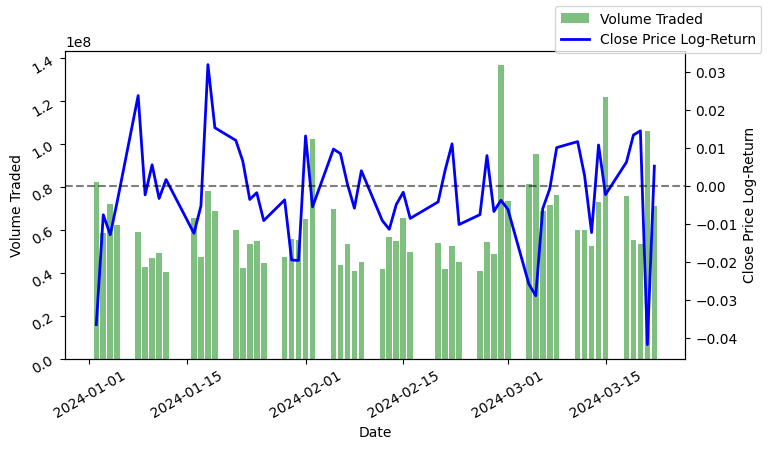

In [46]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))

start = '2024-01-01'
end = '2024-03-23'

ax1.bar(aapl[start:end].index, aapl['Volume'][start:end], color='green', alpha=0.5, label='Volume Traded')
ax1.set_ylabel('Volume Traded')

ax2 = ax1.twinx()

ax2.plot(np.log(aapl['Close']).diff()[start:end], color='blue', linewidth=2, label='Close Price Log-Return')
ax2.set_ylabel('Close Price Log-Return')

ax1.set_xlabel('Date')
ax1.tick_params(labelrotation=30)

ax2.axhline(0, color='black', linestyle='dashed', alpha=0.5)

fig.legend()

None

## 1.6. Полезные графики для работы с временными рядами

### 1.6.1. Графики скользящего среднего

При работе с временными рядами часто возникает необходимость использования данных, касающихся исторических данных ряда, таких как, например, графики скользящего среднего значения временного ряда и его стандартных отклонений.

Для получения таких графиков данные для начала нужно обработать и получить необходимые значения.

На практике для такого рода анализа чаще других используются подходы расчета `MA` (Moving Average) и `EWMA` (Exponentially Weighted Moving Average).

$$MA_{t}^{N} = \frac{p_{t} + p_{t-1} + ... + p_{t-N+1} + p_{t-N}}{N}$$

$$EWMA^{N}_{t} = \alpha p_{t} + (1 - \alpha) EWMA^{N-1}_{t-1} = \alpha p_{t} + (1 - \alpha) (\alpha p_{t-1} + (1 - \alpha) EWMA^{N-2}_{t-2}) = ... = $$

$$ = \alpha p_{t} + (1 - \alpha) \alpha p_{t-1} + (1 - \alpha)^{2} \alpha p_{t-2} + ... + (1 - \alpha)^{N} \alpha p_{t-N}$$

In [47]:
aapl['Close_LR'] = np.log(aapl['Close']).diff()

aapl['Close_EWMA50'] = aapl['Close'].ewm(alpha=0.2, min_periods=50).mean()
aapl['Close_EWMA100'] = aapl['Close'].ewm(alpha=0.2, min_periods=100).mean()

aapl['Close_MA50'] = aapl['Close'].rolling(50).mean()
aapl['Close_MA100'] = aapl['Close'].rolling(100).mean()

aapl['Close_Vol_EWMA50'] = np.sqrt(aapl['Close_LR'].apply(np.square).ewm(alpha=0.2, min_periods=50).mean())
aapl['Close_Vol_EWMA100'] = np.sqrt(aapl['Close_LR'].apply(np.square).ewm(alpha=0.2, min_periods=100).mean())

aapl['Close_Vol_MA50'] = aapl['Close_LR'].rolling(50).std()
aapl['Close_Vol_MA100'] = aapl['Close_LR'].rolling(100).std()

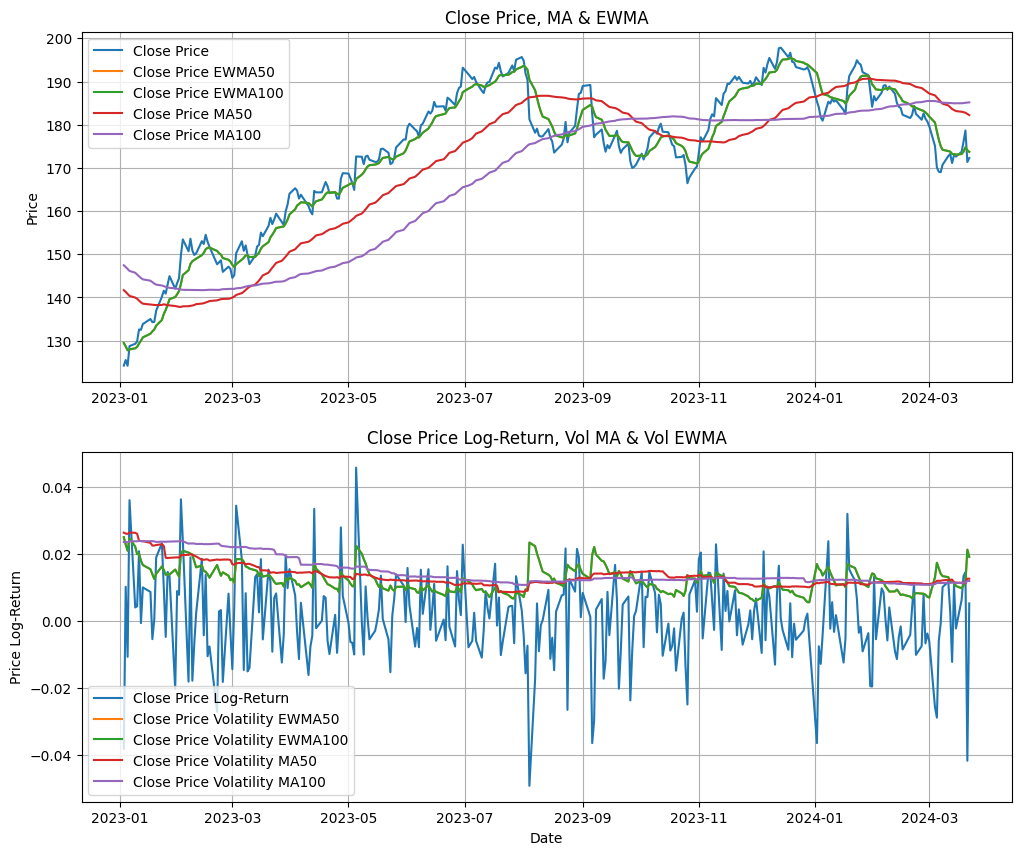

In [48]:
fig, ax = plt.subplots(2,1, figsize=(12,10))

start = '2023-01-01'
end = '2024-03-23'

ax[0].plot(aapl['Close'][start:end], label='Close Price')
ax[0].plot(aapl['Close_EWMA50'][start:end], label='Close Price EWMA50')
ax[0].plot(aapl['Close_EWMA100'][start:end], label='Close Price EWMA100')
ax[0].plot(aapl['Close_MA50'][start:end], label='Close Price MA50')
ax[0].plot(aapl['Close_MA100'][start:end], label='Close Price MA100')

ax[0].set_ylabel('Price')
ax[0].set_title('Close Price, MA & EWMA')
ax[0].legend()
ax[0].grid()

ax[1].plot(aapl['Close_LR'][start:end], label='Close Price Log-Return')
ax[1].plot(aapl['Close_Vol_EWMA50'][start:end], label='Close Price Volatility EWMA50')
ax[1].plot(aapl['Close_Vol_EWMA100'][start:end], label='Close Price Volatility EWMA100')
ax[1].plot(aapl['Close_Vol_MA50'][start:end], label='Close Price Volatility MA50')
ax[1].plot(aapl['Close_Vol_MA100'][start:end], label='Close Price Volatility MA100')

ax[1].set_ylabel('Price Log-Return')
ax[1].set_xlabel('Date')
ax[1].set_title('Close Price Log-Return, Vol MA & Vol EWMA')
ax[1].legend()
ax[1].grid()

None

### 1.6.2. График автокоррелированности значений временного ряда

При работы с временными рядами часто возникает необходимость оценки зависимости текущего значения ряда от лагов этого значения. Тогда нам на помощь может прийти график автокоррелированности временного ряда `plot_acf`, который лежит в модуле `statsmodels.graphics.tsaplots`.

In [51]:
from statsmodels.graphics.tsaplots import plot_acf

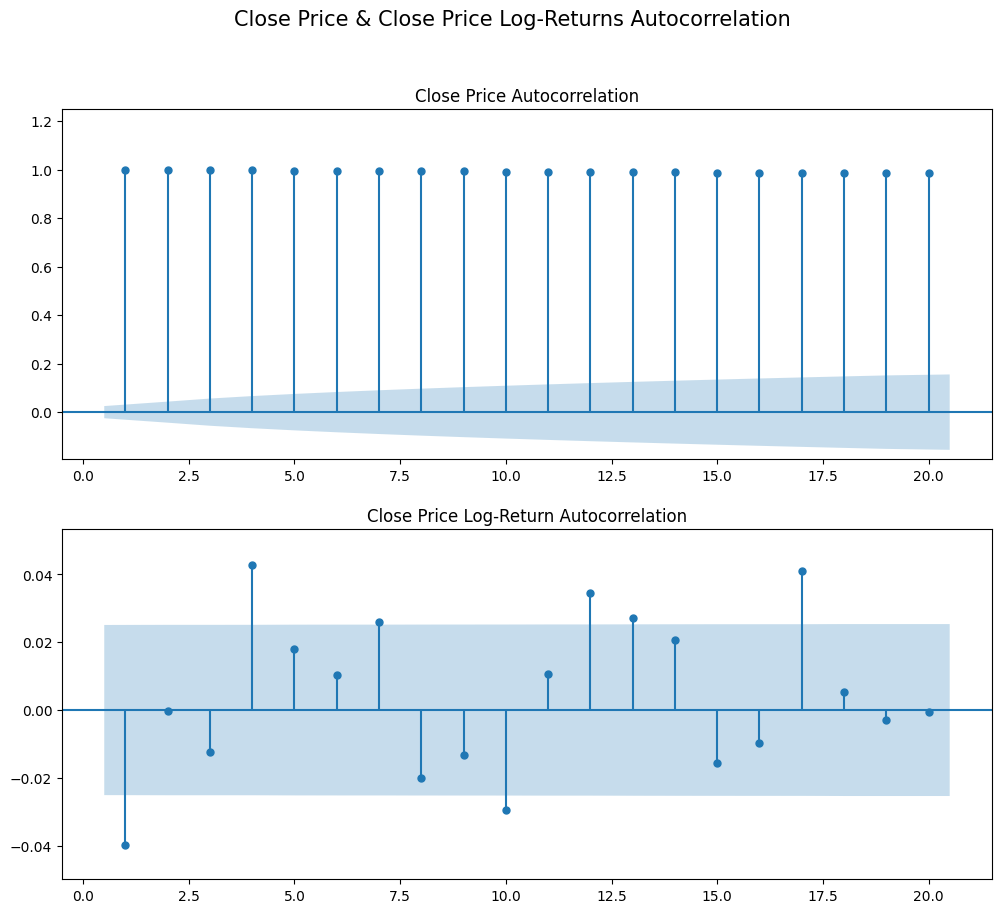

In [52]:
fig, ax = plt.subplots(2,1, figsize=(12,10))

plot_acf(aapl['Close'], ax=ax[0], lags=np.arange(1,21), auto_ylims=True, title='Close Price Autocorrelation')

plot_acf(aapl['Close_LR'][1:], ax=ax[1], lags=np.arange(1,21), auto_ylims=True, title='Close Price Log-Return Autocorrelation')

fig.suptitle('Close Price & Close Price Log-Returns Autocorrelation', fontsize=15)

None

На дальнейших занятиях будут еще примеры визуализации данных, подходящие к темам занятий.